# Compare Motions
The purpose of this notebook is to compare data of 2 files. The first motion is generated by running the Mahony filter on the raspberry pi. The other motion is generated by saving raw IMU data on the raspberry pi, transferring it to the computer and running the mahony filter there. 

The goal is to develop a python script to process the raw IMU data fully on the computer, for higher raspbery pi sampling rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

not_locked = ['time', 'pelvis_rotation', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l', 'elbow_flex_l']

Comparing the motion files. The motion file generated by the RPI was manually processed by Opensim by solving the IK on the quarternions. The other was generated through the visualise script|

In [2]:
rpi_filter = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1757\ik_tiny_file.mot",sep='\t',skiprows=6)
com_filter = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1757\ik_new_tiny_file.mot",sep='\t',skiprows=6)

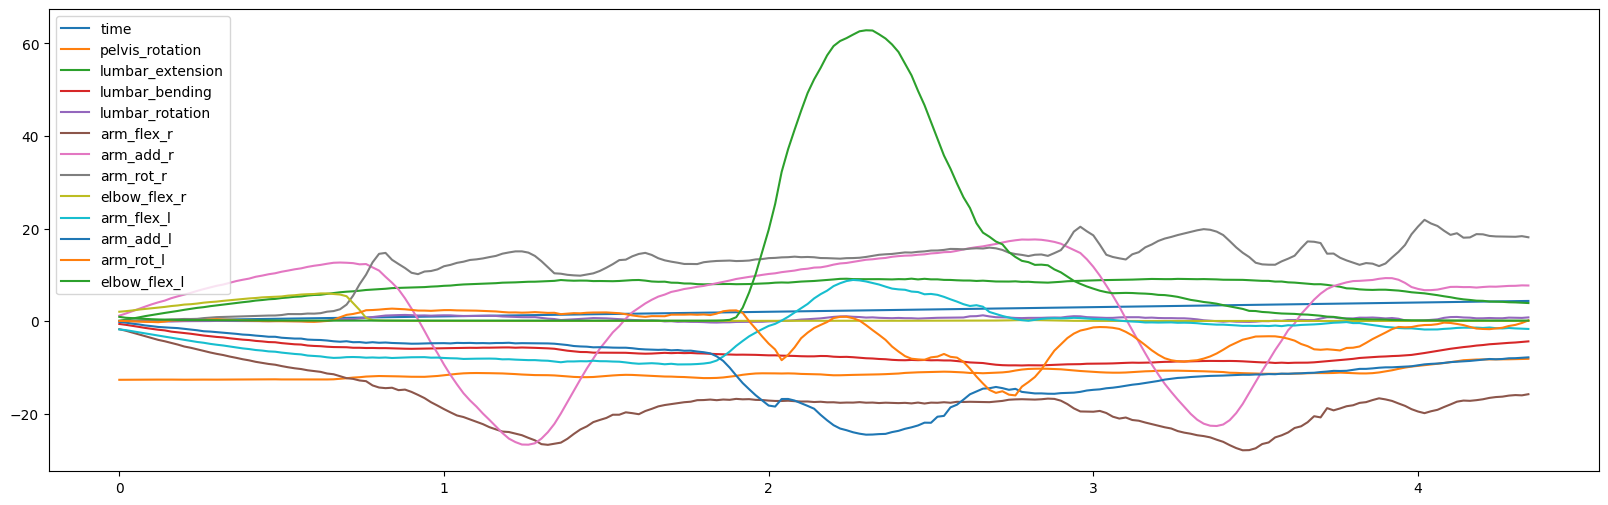

In [47]:
x = rpi_filter["time"]

plt.figure(figsize=(20,6))
for col in not_locked:
    y = rpi_filter[col]
    plt.plot(x,y,label = col)


plt.legend()
plt.show()

In [3]:
ranges = []
for col in not_locked:
    ranges.append((col,com_filter[col].max() - rpi_filter[col].min()))

ranges.sort(key = lambda x: x[1],reverse = True)
for x in ranges[:5]:
    print(x)

('arm_flex_r', 117.92610611255176)
('lumbar_bending', 99.60179710045526)
('arm_rot_r', 89.99364543303156)
('arm_add_l', 82.47644216519711)
('lumbar_rotation', 79.12517556792659)


Compare the first 4 items

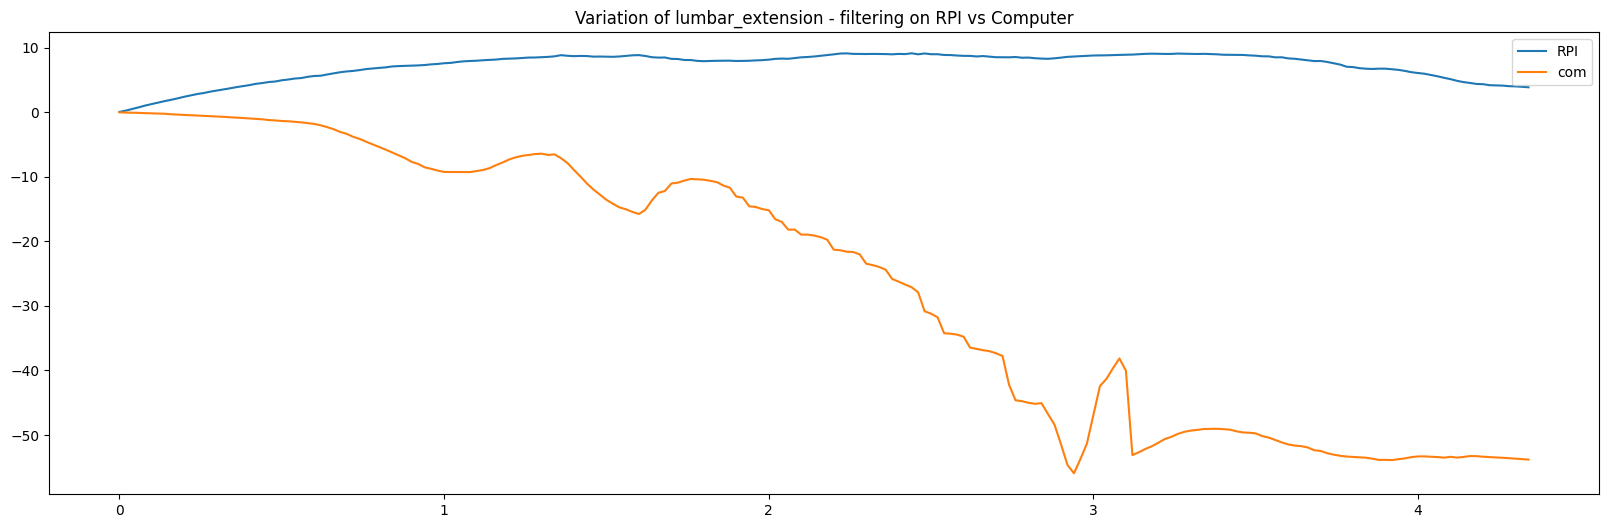

In [4]:
x = rpi_filter["time"]
y_variable = 'lumbar_extension'

plt.figure(figsize=(20,6))

y = rpi_filter[y_variable]
plt.plot(x,y,label = 'RPI')

y = com_filter[y_variable]
plt.plot(x,y,label = 'com')

plt.title("Variation of lumbar_extension - filtering on RPI vs Computer")


plt.legend()
plt.show()

Comparing the quarternion files

In [5]:
rpi_quat = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1757\tiny_file.sto",sep='\t',skiprows=5)
com_quat = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1757\new_tiny_file.sto",sep='\t',skiprows=5)

In [6]:
rpi_quat.head()

,time,Unnamed: 1,pelvis_imu,torso_imu,humerus_l_imu,ulna_l_imu,humerus_r_imu,ulna_r_imu
0,0.00,"0.6845986384757144,0.5992073308343492,-0.23389...","0.6748422967666571,0.7322308980155436,-0.07630...","0.6714154897949585,0.7408884714097432,-0.01415...","0.6516008630338784,0.7101102297608508,0.142609...","0.7901597551652895,0.6002397139983825,-0.11884...","0.559938594293556,0.33001825327312895,-0.57485...",NaN
1,0.02,"0.6845385689439238,0.5982373636779411,-0.23473...","0.6765456043409287,0.7304421789758371,-0.07737...","0.6707204391851356,0.741489106674814,-0.014786...","0.6518068977919966,0.710110722584152,0.1441120...","0.7890946844343518,0.6018182012481896,-0.11785...","0.5585273319457602,0.3325415913666626,-0.57341...",NaN
2,0.04,"0.684451178503959,0.5971821243987482,-0.235689...","0.6780552223846588,0.7288199294447019,-0.07837...","0.6697127939058783,0.7423759027079002,-0.01508...","0.652235718778069,0.7096825095069531,0.1455787...","0.7878633032073623,0.6034854126890679,-0.11729...","0.5570369074443119,0.33470965500305006,-0.5720...",NaN
3,0.06,"0.684446994611896,0.5962263195479482,-0.236563...","0.6795822065671139,0.727164254052553,-0.079524...","0.6693466730294291,0.7426755711125449,-0.01561...","0.6527725375721827,0.7091588900878537,0.147046...","0.7866985794781591,0.6050695661162118,-0.11668...","0.5554246953949779,0.3369125686261195,-0.57096...",NaN
4,0.08,"0.684386243508055,0.5951993778237671,-0.237396...","0.6810439263490907,0.7255607768709014,-0.08062...","0.6689505388100093,0.74299930950065,-0.0163515...","0.6527624763268769,0.7091416143211805,0.148630...","0.7857826860530325,0.6063983218631412,-0.11594...","0.553797884940141,0.3389405092996335,-0.569893...",NaN


In [7]:
#Strange that the processing of data shifts all the columns

def shift_cols(df):
    old_columns = df.columns
    column_names = ['time', 'pelvis_imu', 'torso_imu', 'humerus_l_imu','ulna_l_imu', 'humerus_r_imu', 'ulna_r_imu']
    col_names = {}
    for i, name in enumerate(column_names):
        col_names[old_columns[i]] = name

    filtered_df = df.drop('ulna_r_imu',axis = 1)
    filtered_df = filtered_df.rename(columns = col_names)

    return filtered_df

rpi_quat_filtered = shift_cols(rpi_quat)
com_quat_filtered = shift_cols(com_quat)

In [8]:
rpi_quat_filtered.head()

,time,pelvis_imu,torso_imu,humerus_l_imu,ulna_l_imu,humerus_r_imu,ulna_r_imu
0,0.00,"0.6845986384757144,0.5992073308343492,-0.23389...","0.6748422967666571,0.7322308980155436,-0.07630...","0.6714154897949585,0.7408884714097432,-0.01415...","0.6516008630338784,0.7101102297608508,0.142609...","0.7901597551652895,0.6002397139983825,-0.11884...","0.559938594293556,0.33001825327312895,-0.57485..."
1,0.02,"0.6845385689439238,0.5982373636779411,-0.23473...","0.6765456043409287,0.7304421789758371,-0.07737...","0.6707204391851356,0.741489106674814,-0.014786...","0.6518068977919966,0.710110722584152,0.1441120...","0.7890946844343518,0.6018182012481896,-0.11785...","0.5585273319457602,0.3325415913666626,-0.57341..."
2,0.04,"0.684451178503959,0.5971821243987482,-0.235689...","0.6780552223846588,0.7288199294447019,-0.07837...","0.6697127939058783,0.7423759027079002,-0.01508...","0.652235718778069,0.7096825095069531,0.1455787...","0.7878633032073623,0.6034854126890679,-0.11729...","0.5570369074443119,0.33470965500305006,-0.5720..."
3,0.06,"0.684446994611896,0.5962263195479482,-0.236563...","0.6795822065671139,0.727164254052553,-0.079524...","0.6693466730294291,0.7426755711125449,-0.01561...","0.6527725375721827,0.7091588900878537,0.147046...","0.7866985794781591,0.6050695661162118,-0.11668...","0.5554246953949779,0.3369125686261195,-0.57096..."
4,0.08,"0.684386243508055,0.5951993778237671,-0.237396...","0.6810439263490907,0.7255607768709014,-0.08062...","0.6689505388100093,0.74299930950065,-0.0163515...","0.6527624763268769,0.7091416143211805,0.148630...","0.7857826860530325,0.6063983218631412,-0.11594...","0.553797884940141,0.3389405092996335,-0.569893..."


In [9]:
#Split each col into quarternion data

def split_df(df):
    new_df = df['time']
    for col in df.columns[1:]:
        column = df[col]
        dict = {}
        for i in range(4):
            dict[i] = col + " " + str(i) #how to name the cols
        split_up = column.str.split(",", expand = True).rename(columns=dict)
        float_split=split_up.astype('float')
        new_df = pd.concat([new_df, float_split], axis=1)
    
    return new_df

com_numer = split_df(com_quat_filtered)
rpi_numer = split_df(rpi_quat_filtered)

In [10]:
com_numer.head()

,time,pelvis_imu 0,pelvis_imu 1,pelvis_imu 2,pelvis_imu 3,torso_imu 0,torso_imu 1,torso_imu 2,torso_imu 3,humerus_l_imu 0,...,ulna_l_imu 2,ulna_l_imu 3,humerus_r_imu 0,humerus_r_imu 1,humerus_r_imu 2,humerus_r_imu 3,ulna_r_imu 0,ulna_r_imu 1,ulna_r_imu 2,ulna_r_imu 3
0,0.00,0.678420,0.604648,-0.238959,0.342121,0.670749,0.735867,-0.077171,0.051373,0.672503,...,0.133973,0.234949,0.790663,0.597978,-0.128667,-0.026812,0.565690,0.321735,-0.578978,-0.491188
1,0.02,0.672222,0.609956,-0.244117,0.341289,0.666587,0.739527,-0.078105,0.051584,0.673436,...,0.125213,0.243762,0.791623,0.594804,-0.138463,-0.019220,0.571544,0.313349,-0.582679,-0.485422
2,0.04,0.665635,0.615455,-0.249289,0.340588,0.662363,0.743194,-0.078976,0.051979,0.674019,...,0.116449,0.252397,0.792362,0.591674,-0.148161,-0.011504,0.577163,0.304947,-0.586414,-0.479592
3,0.06,0.659094,0.620830,-0.254596,0.339627,0.658076,0.746873,-0.079889,0.052297,0.675098,...,0.107958,0.261548,0.792549,0.589020,-0.157835,-0.003085,0.582737,0.296400,-0.589856,-0.473956
4,0.08,0.652157,0.626377,-0.259878,0.338832,0.653560,0.750699,-0.080795,0.052754,0.675824,...,0.099201,0.270343,0.793070,0.585659,-0.167409,0.004295,0.588099,0.288131,-0.593326,-0.468064


In [30]:
rpi_numer.head()

,time,pelvis_imu 0,pelvis_imu 1,pelvis_imu 2,pelvis_imu 3,torso_imu 0,torso_imu 1,torso_imu 2,torso_imu 3,humerus_l_imu 0,...,ulna_l_imu 2,ulna_l_imu 3,humerus_r_imu 0,humerus_r_imu 1,humerus_r_imu 2,humerus_r_imu 3,ulna_r_imu 0,ulna_r_imu 1,ulna_r_imu 2,ulna_r_imu 3
0,0.00,0.695935,0.508722,-0.332334,0.382663,0.675185,0.729928,-0.050165,0.093886,0.630634,...,0.319127,0.370626,0.759330,0.624327,-0.139961,-0.118509,0.706275,0.555594,0.269999,0.345820
1,0.02,0.696881,0.508962,-0.331113,0.381679,0.676289,0.728869,-0.050450,0.094007,0.630991,...,0.320563,0.368926,0.759202,0.624326,-0.140189,-0.119065,0.705731,0.556856,0.270100,0.344822
2,0.04,0.697751,0.509203,-0.329967,0.380760,0.677406,0.727780,-0.050789,0.094221,0.631295,...,0.321545,0.366990,0.759212,0.624354,-0.139946,-0.119142,0.705149,0.557992,0.270149,0.344135
3,0.06,0.698514,0.509422,-0.328798,0.380079,0.678443,0.726766,-0.051113,0.094415,0.631590,...,0.322789,0.365774,0.759141,0.624315,-0.140144,-0.119559,0.704363,0.559157,0.270601,0.343499
4,0.08,0.699210,0.509595,-0.327745,0.379475,0.679412,0.725750,-0.051469,0.095065,0.631751,...,0.323361,0.363820,0.759085,0.624333,-0.140215,-0.119745,0.703793,0.560116,0.270682,0.343040


In [38]:
com_numer_diff = com_numer.max() - com_numer.min()
rpi_numer_diff = rpi_numer.max() - rpi_numer.min()

In [39]:
#Combine diffs into one df
quat_range = pd.concat([rpi_numer_diff,com_numer_diff],axis=1)
quat_range = quat_range.rename(columns={0: "rpi", 1: "com"})
quat_range.head()

,rpi,com
time,4.340000,4.340000
pelvis_imu 0,0.046140,0.923355
pelvis_imu 1,0.070194,0.221139
pelvis_imu 2,0.080695,0.335377
pelvis_imu 3,0.105503,0.311449


In [40]:
quat_range.sort_values(by=['rpi'],ascending=False).head()

,rpi,com
time,4.340000,4.340000
ulna_r_imu 1,0.570905,0.655898
ulna_l_imu 2,0.520522,0.422976
ulna_l_imu 3,0.453265,0.632248
ulna_r_imu 0,0.388135,0.330564


In [41]:
quat_range.sort_values(by=['com'],ascending=False).head()

,rpi,com
time,4.340000,4.340000
torso_imu 0,0.058047,1.272338
pelvis_imu 0,0.046140,0.923355
ulna_r_imu 3,0.358599,0.882346
ulna_r_imu 1,0.570905,0.655898


We can ignore time. What is important is to notice that the quarternion data from torso_imu 0 varies quite abit for the computer, however, the raspberry pi does not see much changes

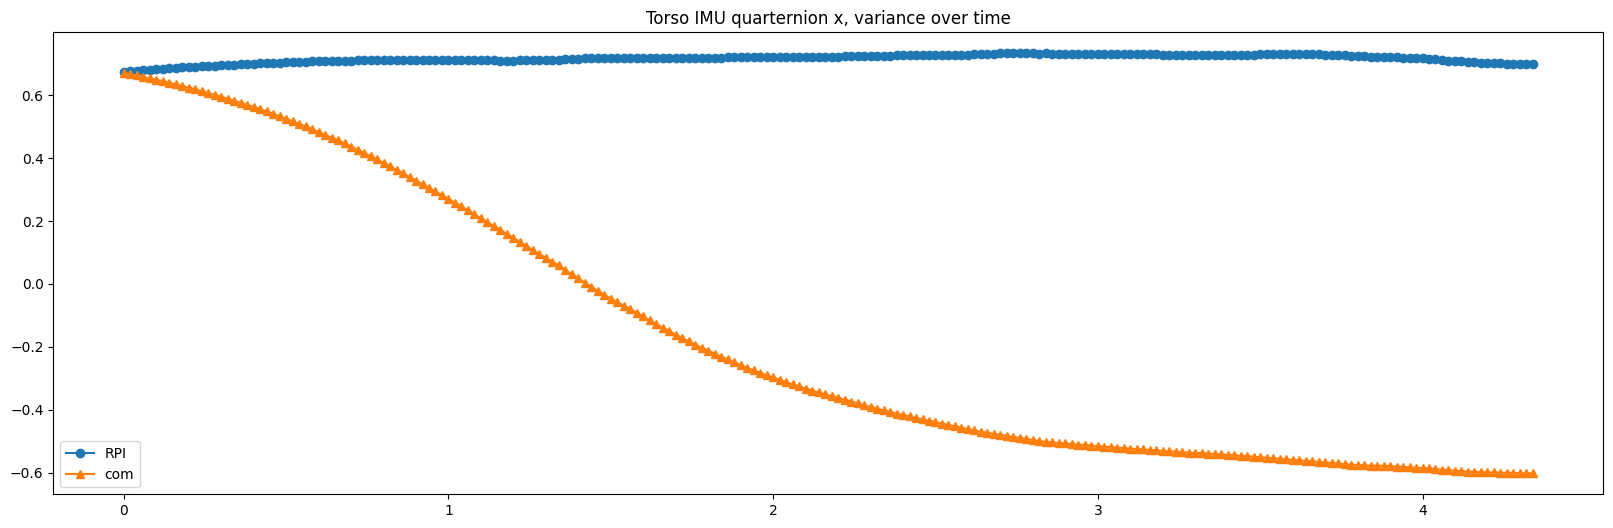

In [43]:

X = com_numer['time']
y_values = ['torso_imu 0']
plt.figure(figsize=(20,6))

for value in y_values:
    plt.plot(x,rpi_numer[value],label = 'RPI',marker= "o")
    plt.plot(x,com_numer[value],label = 'com',marker= "^")

plt.title("Torso IMU quarternion x, variance over time")
plt.legend()
plt.show()


Strange, lets look at raw imu data

In [44]:
import numpy as np
data = np.load(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1757\raw_imu.npy")

torso_imu = data[:,6:12]

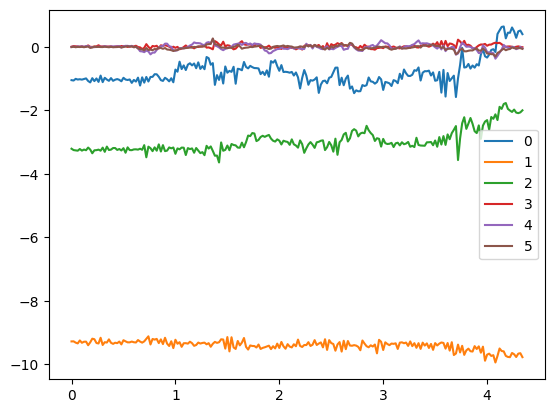

In [47]:
x = [i*0.02 for i in range(torso_imu.shape[0])]

for i in range(6):
    plt.plot(x,torso_imu[:,i],label = i)


plt.legend()
plt.show()


It looks like 0,1,2 is accelerometer data, while 3,4,5 is gyroscopic data. It seems that the gyroscope data for 0 has some bias involved